 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline 

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv = Path("../Resources/whale_returns.csv")

whale_df = pd.read_csv(whale_csv, infer_datetime_format=True, parse_dates= True, index_col = 'Date')
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna().sort_index()
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data = Path("../Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, infer_datetime_format=True, parse_dates= True, index_col = 'Date')
algo_df.sort_index()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna().sort_index()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data = Path("../Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, infer_datetime_format=True, parse_dates= True, index_col = 'Date')
sp500_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df["Close"].str.replace("$", "", regex=True)
sp500_df["Close"] = sp500_df["Close"].astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
sp500_df = sp500_df.sort_index()
sp500_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [12]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Drop nulls
sp500_daily_returns.dropna()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ["S&P 500"]
sp500_daily_returns

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([whale_df, algo_df, sp500_daily_returns], axis ='columns', join='inner')
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

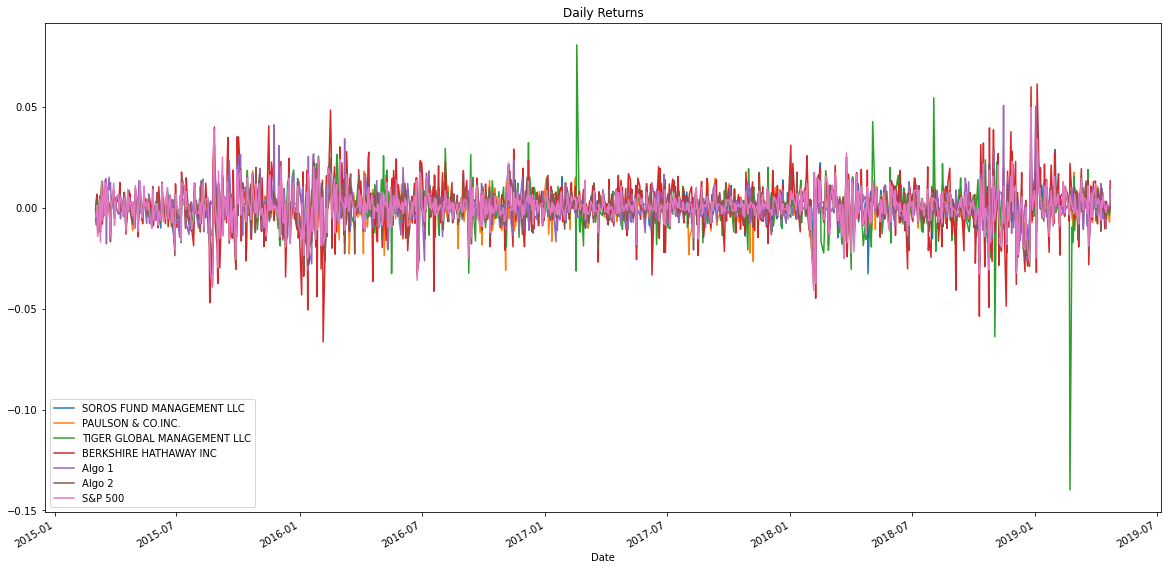

In [16]:
# Plot daily returns of all portfolios
combined_data.plot(figsize = (20,10), title = "Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

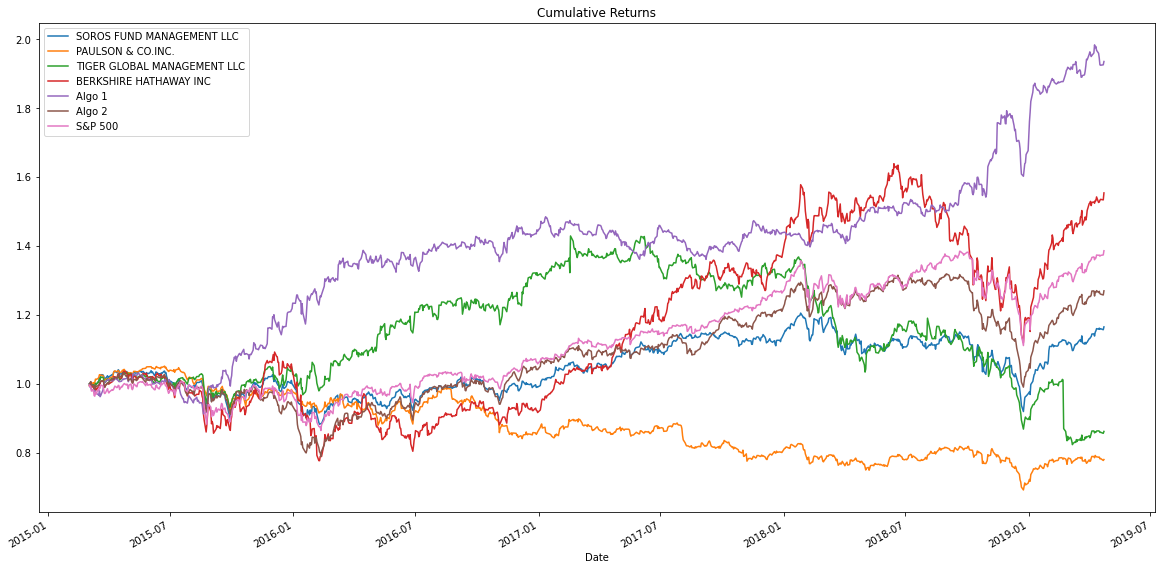

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_data).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10), title = 'Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


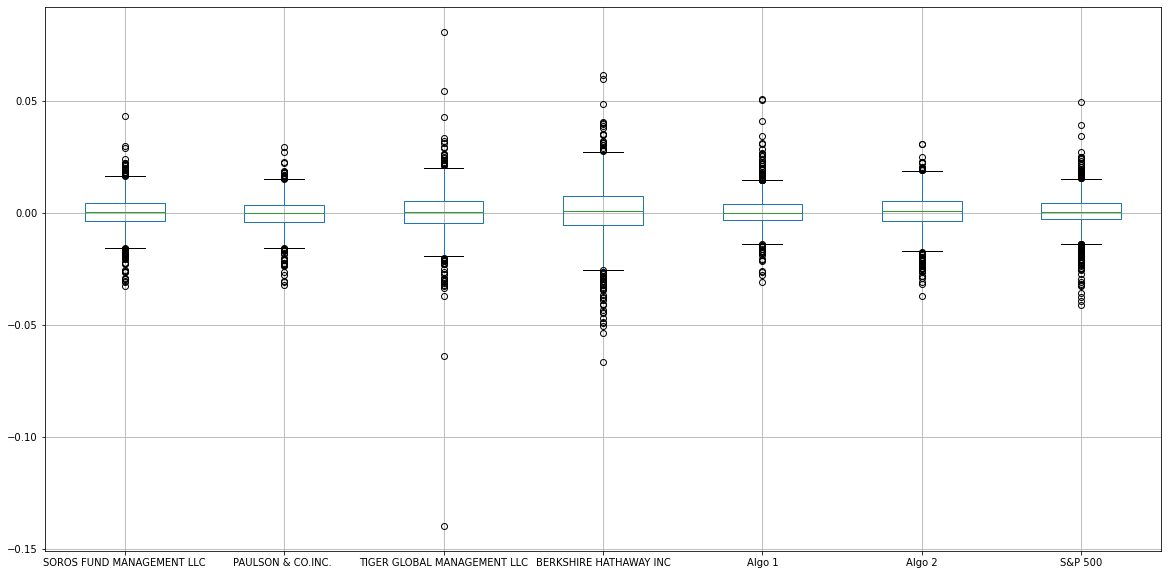

In [18]:
# Box plot to visually show risk
boxplot = combined_data.boxplot(figsize = (20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std_dev = combined_data.std()
daily_std_dev

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
print(f"Tiger Global Management and Berkshire Hathaway are risker than the S&P 500.")

Tiger Global Management and Berkshire Hathaway are risker than the S&P 500.


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_data.std()*np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation 21-Day'}, xlabel='Date'>

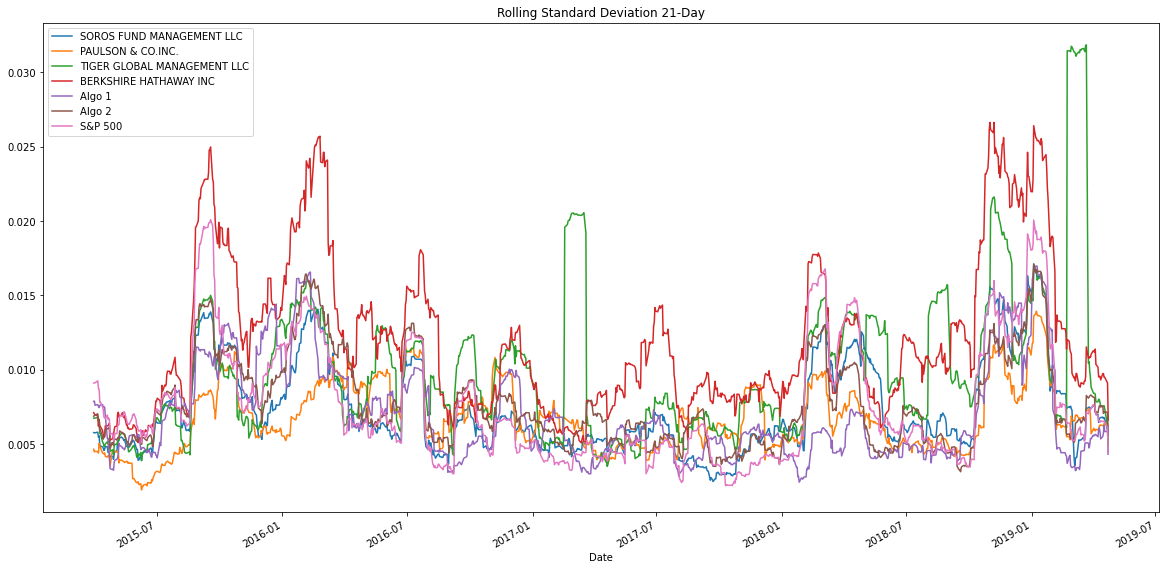

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_std = combined_data.rolling(window = 21).std()
# Plot the rolling standard deviation
rolling_21_std.plot(figsize = (20,10), title = "Rolling Standard Deviation 21-Day")

### Calculate and plot the correlation

Text(0.5, 1.0, 'Correlation')

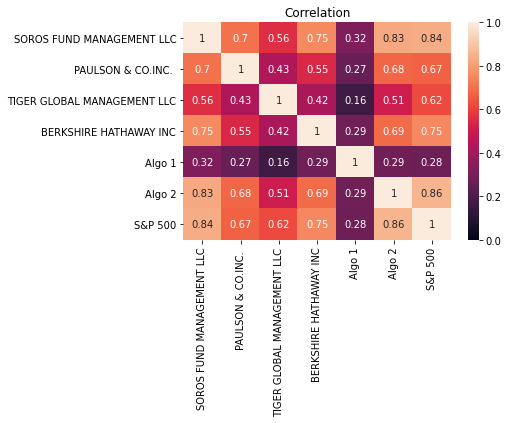

In [23]:
# Calculate the correlation
correlation = combined_data.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=0, vmax=1, annot = True).set_title("Correlation")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [24]:
# Calculate covariance of a single portfolio
soros_cov=  combined_data['SOROS FUND MANAGEMENT LLC'].cov(combined_data['S&P 500'])
print(f"The covariance of Soros Fund Management LLC portfolio is {soros_cov}")
# Calculate variance of S&P 500
sp500_var = combined_data["S&P 500"].var()
# Computing beta
soros_beta = soros_cov/sp500_var
print(f"The Soros Fund Management LLC portfolio has a beta of {soros_beta}")

The covariance of Soros Fund Management LLC portfolio is 5.6585031972036124e-05
The Soros Fund Management LLC portfolio has a beta of 0.773375354779462


<AxesSubplot:title={'center':'Rolling 60 Day Beta of Soros Fund Management Portfolio'}, xlabel='Date'>

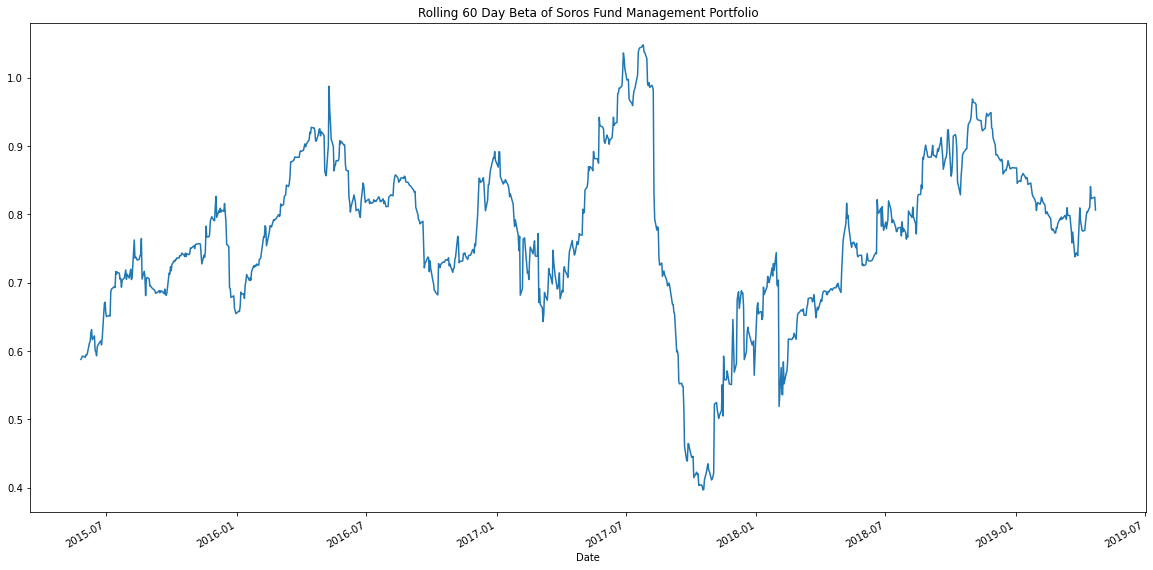

In [25]:
# Plot 60 day rolling beta of Soros Portfolio
#calculate 60 day rolling covariance of Soros Portfolio daily returns
soros_cov60 = combined_data["SOROS FUND MANAGEMENT LLC"].rolling(window = 60).cov(combined_data["S&P 500"])
#calculate 60 day rolling variance of SP daily returns
sp_500_var60 = combined_data["S&P 500"].rolling(window= 60).var()
#calculate 60 day beta 
soros_beta60 = soros_cov60/sp_500_var60

soros_beta60.plot(figsize = (20,10), title = "Rolling 60 Day Beta of Soros Fund Management Portfolio")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponential Weighted Average'}, xlabel='Date'>

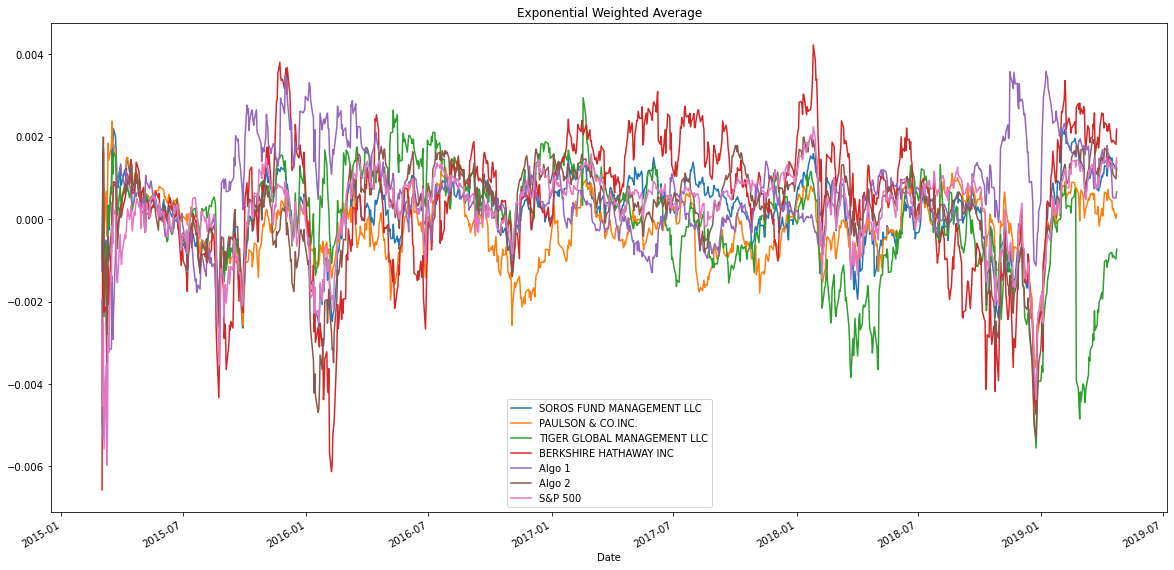

In [26]:
# Use `ewm` to calculate the rolling window
rolling_ewm = combined_data.ewm(halflife=21).mean()
rolling_ewm.plot(figsize = (20,10), title = "Exponential Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_data.mean()*252)/ (combined_data.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

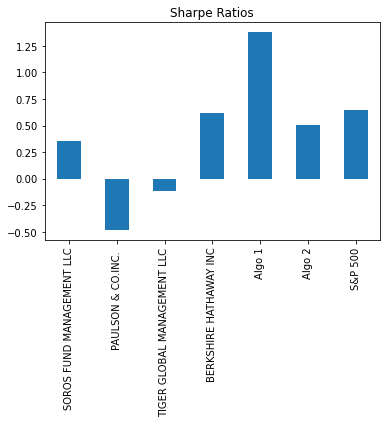

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = "bar", title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 outperforms the S&P 500 and the whale portfolios, Algo 2 does not. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [29]:
# Reading data from 1st stock
goog_csv = Path("../Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv,infer_datetime_format=True, parse_dates= True , index_col = 'Trade DATE')
goog_df = goog_df.sort_index()
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [30]:
# Reading data from 2nd stock
cost_csv = Path("../Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv, infer_datetime_format=True, parse_dates= True, index_col = 'Trade DATE')
cost_df = cost_df.sort_index()
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [31]:
# Reading data from 3rd stock
aapl_csv = Path("../Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, infer_datetime_format=True, parse_dates=True, index_col = 'Trade DATE')
aapl_df = aapl_df.sort_index()
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [32]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([goog_df, cost_df, aapl_df], axis='columns', join='inner') 
combined_stocks

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,COST,195.76,AAPL,188.59
2018-05-14,GOOG,1100.20,COST,195.88,AAPL,188.15
2018-05-15,GOOG,1079.23,COST,195.48,AAPL,186.44
2018-05-16,GOOG,1081.77,COST,198.71,AAPL,188.18
2018-05-17,GOOG,1078.59,COST,199.60,AAPL,186.99
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,COST,244.62,AAPL,211.75
2019-05-06,GOOG,1189.39,COST,244.23,AAPL,208.48
2019-05-07,GOOG,1174.10,COST,240.18,AAPL,202.86


In [33]:
# Reset Date index
index = combined_stocks.index
index.name = "Date"

combined_stocks

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Date,,,,,,
2018-05-11,GOOG,1098.26,COST,195.76,AAPL,188.59
2018-05-14,GOOG,1100.20,COST,195.88,AAPL,188.15
2018-05-15,GOOG,1079.23,COST,195.48,AAPL,186.44
2018-05-16,GOOG,1081.77,COST,198.71,AAPL,188.18
2018-05-17,GOOG,1078.59,COST,199.60,AAPL,186.99
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,COST,244.62,AAPL,211.75
2019-05-06,GOOG,1189.39,COST,244.23,AAPL,208.48
2019-05-07,GOOG,1174.10,COST,240.18,AAPL,202.86


In [34]:
# Reorganize portfolio data by having a column per symbol
combined_stocks.columns = ['Symbol', 'GOOG', 'Symbol', 'AAPL', 'Symbol','COST']
combined_stocks.drop(combined_stocks.columns[[0,2,4]], axis= 1, inplace =True)
combined_stocks.head()

,GOOG,AAPL,COST
Date,,,
2018-05-11,1098.26,195.76,188.59
2018-05-14,1100.20,195.88,188.15
2018-05-15,1079.23,195.48,186.44
2018-05-16,1081.77,198.71,188.18
2018-05-17,1078.59,199.60,186.99


In [35]:
# Calculate daily returns
daily_returns = combined_stocks.pct_change()
daily_returns.head()

,GOOG,AAPL,COST
Date,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,0.000613,-0.002333
2018-05-15,-0.019060,-0.002042,-0.009088
2018-05-16,0.002354,0.016523,0.009333
2018-05-17,-0.002940,0.004479,-0.006324


In [36]:
# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.head()

,GOOG,AAPL,COST
Date,,,
2018-05-14,0.001766,0.000613,-0.002333
2018-05-15,-0.019060,-0.002042,-0.009088
2018-05-16,0.002354,0.016523,0.009333
2018-05-17,-0.002940,0.004479,-0.006324
2018-05-18,-0.011339,-0.003206,-0.003637


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns =daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
joined_port_df = pd.concat([portfolio_returns, combined_data], axis='columns', join ='inner')
joined_port_df.columns = ['My Portfolio', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','S&P 500']
joined_port_df.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_port_df = joined_port_df.dropna()
joined_port_df.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
annualized_std_portfolio = combined_stocks.std()*np.sqrt(252)
annualized_std_portfolio


GOOG    1077.034185
AAPL     229.138982
COST     340.293451
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Portfolio Rolling 21 Day Std Deviation'}, xlabel='Date'>

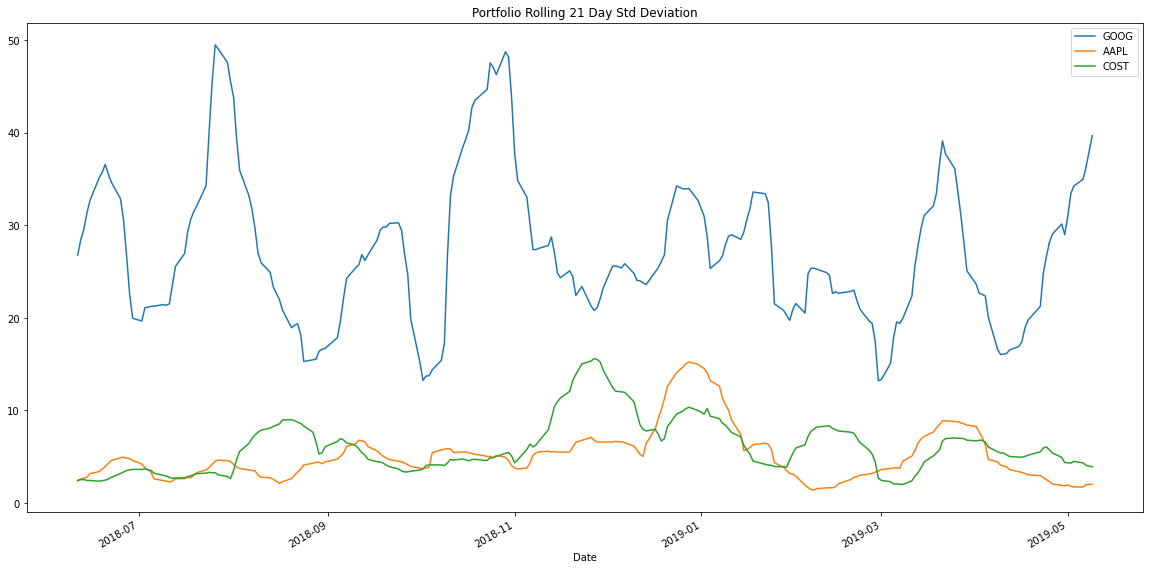

In [41]:
# Calculate rolling standard deviation
rolling_portfolio_std = combined_stocks.rolling(window=21).std()

# Plot rolling standard deviation
rolling_portfolio_std.plot( figsize = (20,10), title ='Portfolio Rolling 21 Day Std Deviation' )

### Calculate and plot the correlation

Text(0.5, 1.0, 'Correlation My Portfolio')

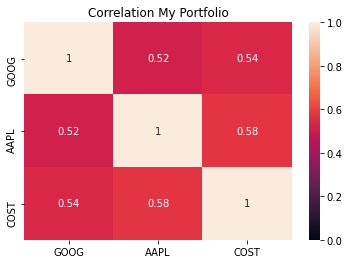

In [42]:
# Calculate and plot the correlation
portfolio_corr = combined_stocks.corr()
sns.heatmap(portfolio_corr, vmin=0, vmax=1, annot = True).set_title("Correlation My Portfolio")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta My Portfolio'}, xlabel='Date'>

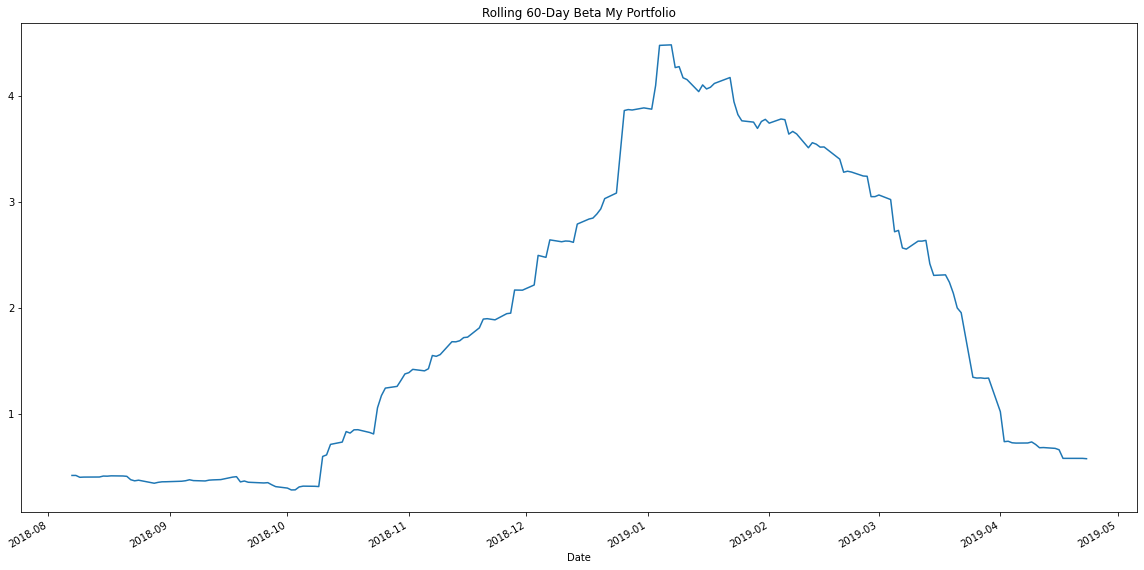

In [45]:
# Calculate and plot Beta
cov_60_portfolio = joined_port_df['My Portfolio'].rolling(window = 60).cov(combined_data['S&P 500'])

var_60_portfolio = combined_data['S&P 500'].var()

beta_60_portfolio = cov_60_portfolio / var_60_portfolio

beta_60_portfolio.plot( figsize = (20,10), title = "Rolling 60-Day Beta My Portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Calculate Annualzied Sharpe Ratios
all_sharpe_ratio = (joined_port_df.mean()*252)/ (joined_port_df.std()*np.sqrt(252))
all_sharpe_ratio

My Portfolio                   0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of All Returns'}>

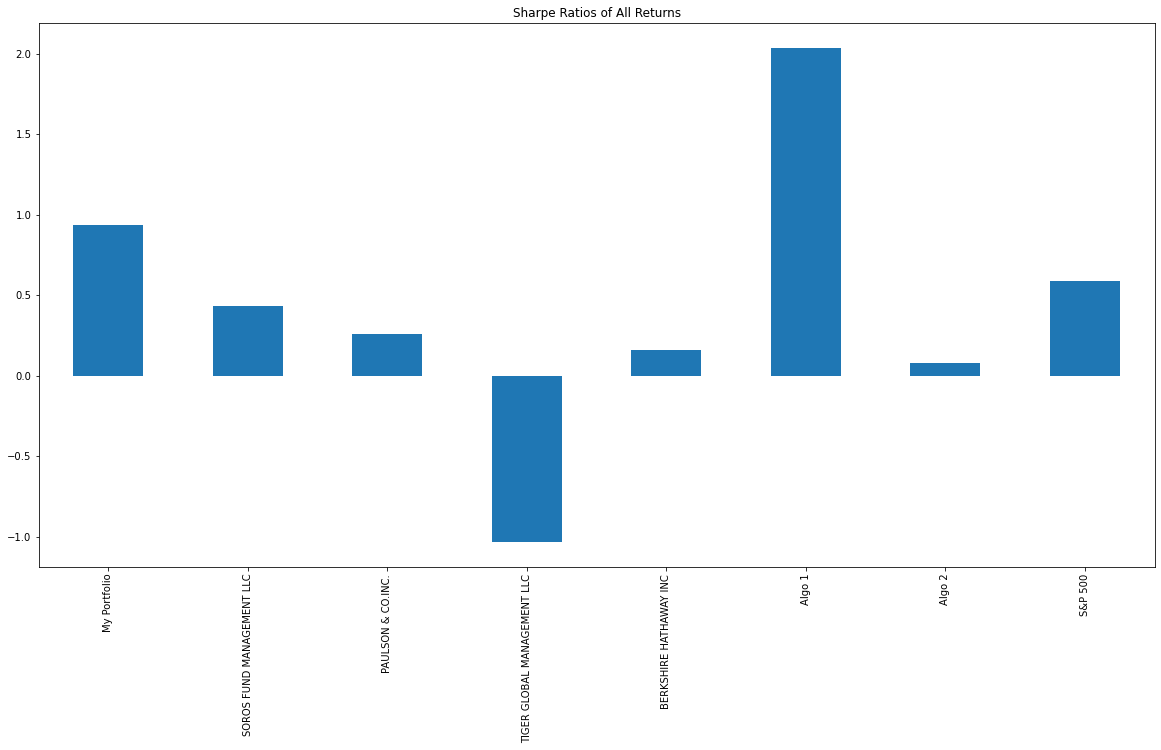

In [47]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratio.plot(kind = 'bar', figsize = (20,10), title ='Sharpe Ratios of All Returns')

### How does your portfolio do?

Write your answer here!

In [52]:
print(f"Algo 1 has the highest sharpe ratio meaning it yields the highest return. My portfolio comes in second and does better compared to the S&P 500.")

Algo 1 has the highest sharpe ratio meaning it yields the highest return. My portfolio comes in second and does better compared to the S&P 500.
